# Principal Component Analysis

## Concept
- Principal component analysis (PCA) is a statistical technique that reduces the number of dimensions in a dataset while preserving as much data variation as possible. PCA works by linearly transforming data onto a new coordinate system that identifies the directions with the greatest variation. 
- The resulting new variables are called principal components (PCs), and they are orthogonal to each other. The PCs are linear combinations of the original variables that maximize the variance of all the variables. 
- This process provides an approximation of the original data table using only the PCs.

## Step-by-step Guide 
### 1. Standardization:
- Why? Data features often have different units and scales; for example, one feature might be in kilograms, and another in centimeters. Standardization (mean-subtraction and division by the standard deviation) ensures each feature contributes equally.
- How? Convert each feature to have zero mean and unit variance.
### 2. Covariance Matrix Computation:
- Why? This matrix helps identify the correlation between different features in the data. High correlation between two features means they contain redundant information.
- How? Calculate the covariance matrix from the standardized data. Each element of this matrix measures the covariance between two features.
### 3. Eigenvalue Decomposition:
- Why? This step finds the directions (called principal components) along which the variance of the data is maximized. These directions are the eigenvectors of the covariance matrix.
- How? Compute the eigenvectors and their corresponding eigenvalues. The eigenvectors define the new axis directions, and the eigenvalues tell how much variance there is in the data along these new axes.
### 4. Selecting Principal Components:
- Why? Not all principal components are equally useful; typically, we want to reduce the dimensionality by selecting the most significant directions (those with the highest eigenvalues).
- How? Rank the eigenvectors from highest to lowest corresponding eigenvalue. The top few eigenvectors are your principal components.
### 5. Projection:
- Why? Transform the original data onto the new axis defined by the selected principal components to reduce dimensionality and highlight the structure of the data.
- How? Project each data point onto the selected principal components. This results in a new dataset with reduced dimensions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('~/desktop/autos.csv').drop('price', axis = 1)

In [3]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,4,130,mpfi,3.47,2.68,9,111,5000,21,27
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,4,130,mpfi,3.47,2.68,9,111,5000,21,27
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,6,152,mpfi,2.68,3.47,9,154,5000,19,26
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,4,109,mpfi,3.19,3.40,10,102,5500,24,30
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,5,136,mpfi,3.19,3.40,8,115,5500,18,22


## Data Prep and Standardization

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
categorical_columns = ["make", "fuel_type", "aspiration", "body_style", "drive_wheels", "engine_location", "engine_type", "fuel_system"]
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.to_list()

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [7]:
df = preprocessor.fit_transform(df)
column_names = preprocessor.get_feature_names_out()

df = pd.DataFrame(df, columns=column_names)


In [8]:
df.head()

,num__symboling,num__num_of_doors,num__wheel_base,num__length,num__width,num__height,num__curb_weight,num__num_of_cylinders,num__engine_size,num__bore,...,cat__engine_type_ohc,cat__engine_type_ohcf,cat__engine_type_ohcv,cat__fuel_system_1bbl,cat__fuel_system_2bbl,cat__fuel_system_idi,cat__fuel_system_mfi,cat__fuel_system_mpfi,cat__fuel_system_spdi,cat__fuel_system_spfi
0,1.78685,-1.175889,-1.682379,-0.444024,-0.841263,-2.122598,-0.025713,-0.411247,0.045215,0.513027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.78685,-1.175889,-1.682379,-0.444024,-0.841263,-2.122598,-0.025713,-0.411247,0.045215,0.513027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.16397,-1.175889,-0.720911,-0.251195,-0.184679,-0.615412,0.497764,1.548523,0.575559,-2.394827,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.97541,0.850420,0.142781,0.182672,0.143612,0.180047,-0.427362,-0.411247,-0.461021,-0.517605,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.97541,0.850420,0.077596,0.182672,0.237410,0.180047,0.499668,0.568638,0.189854,-0.517605,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Covariance Matrix Calculation

In [9]:
df.cov()

,num__symboling,num__num_of_doors,num__wheel_base,num__length,num__width,num__height,num__curb_weight,num__num_of_cylinders,num__engine_size,num__bore,...,cat__engine_type_ohc,cat__engine_type_ohcf,cat__engine_type_ohcv,cat__fuel_system_1bbl,cat__fuel_system_2bbl,cat__fuel_system_idi,cat__fuel_system_mfi,cat__fuel_system_mpfi,cat__fuel_system_spdi,cat__fuel_system_spfi
num__symboling,1.005208,-0.662555,-0.539311,-0.365086,-0.249031,-0.520500,-0.232290,-0.044030,-0.068683,-0.145539,...,-0.010598,0.012810,-0.001577,-0.007511,-0.004511,-0.055620,0.009307,0.011759,0.041496,0.005080
num__num_of_doors,-0.662555,1.005208,0.449790,0.402723,0.236571,0.526527,0.210942,-0.051761,-0.003034,0.127819,...,-0.008694,0.003117,-0.016295,-0.025154,-0.001476,0.052495,-0.006124,0.020397,-0.034012,-0.006124
num__wheel_base,-0.539311,0.449790,1.005208,0.883887,0.822728,0.594318,0.786246,0.341213,0.571335,0.498541,...,-0.100204,-0.051993,0.040477,-0.046564,-0.195489,0.092894,-0.002566,0.180617,-0.026409,-0.002482
num__length,-0.365086,0.402723,0.883887,1.005208,0.861833,0.493608,0.887291,0.450218,0.690576,0.609531,...,-0.131535,-0.034271,0.061287,-0.072014,-0.232580,0.062853,-0.000471,0.261238,-0.018303,-0.000722
num__width,-0.249031,0.236571,0.822728,0.861833,1.005208,0.312258,0.872159,0.549798,0.743757,0.544454,...,-0.125609,-0.034214,0.091552,-0.046487,-0.248178,0.073568,0.000992,0.231678,-0.009878,-0.001695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cat__fuel_system_idi,-0.055620,0.052495,0.092894,0.062853,0.073568,0.082143,0.068055,-0.010075,0.019792,0.015685,...,0.000621,-0.007691,-0.006666,-0.005640,-0.032815,0.089216,-0.000513,-0.045121,-0.004615,-0.000513
cat__fuel_system_mfi,0.009307,-0.006124,-0.002566,-0.000471,0.000992,-0.008002,0.002474,-0.002142,0.003500,0.005164,...,0.001403,-0.000405,-0.000351,-0.000297,-0.001727,-0.000513,0.005181,-0.002375,-0.000243,-0.000027
cat__fuel_system_mpfi,0.011759,0.020397,0.180617,0.261238,0.231678,0.061588,0.260373,0.199383,0.242328,0.213283,...,-0.074428,0.000837,0.036836,-0.026123,-0.151986,-0.045121,-0.002375,0.249352,-0.021373,-0.002375
cat__fuel_system_spdi,0.041496,-0.034012,-0.026409,-0.018303,-0.009878,-0.065044,-0.001057,-0.019277,-0.000392,-0.001066,...,0.012630,-0.003643,-0.003157,-0.002672,-0.015544,-0.004615,-0.000243,-0.021373,0.044689,-0.000243


## Eigenvalue Decomposition

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(df.cov())

eigenvalues
eigenvectors

array([[-1.01754096e-01, -3.73167956e-01,  2.58247084e-01, ...,
         8.77314587e-16, -2.58666981e-16, -2.54005955e-17],
       [ 9.17078906e-02,  3.78424039e-01, -3.17092007e-01, ...,
         4.99526269e-16, -3.58661811e-16, -1.01949600e-16],
       [ 2.89319421e-01,  2.49499655e-01, -2.35260709e-02, ...,
         1.30264013e-15, -1.97625583e-16,  3.30491642e-17],
       ...,
       [ 1.06130298e-01, -8.93277889e-02, -1.18691409e-01, ...,
         1.69930147e-02, -1.35280123e-02, -5.28684180e-03],
       [-2.24634960e-03, -2.90217285e-02,  2.40524566e-02, ...,
         1.69930147e-02, -1.35280123e-02, -5.28684180e-03],
       [-3.27458388e-04, -2.28846087e-03,  2.29086570e-03, ...,
         1.69930147e-02, -1.35280123e-02, -5.28684180e-03]])

In [11]:
# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

## Select the appropriate number of principal compoenents

In [12]:
import matplotlib.pylab as plt

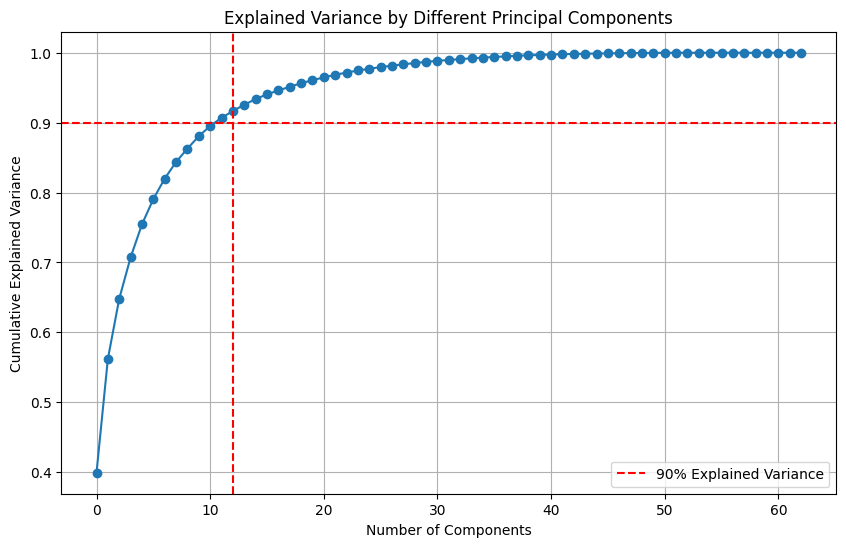

Number of components to explain at least 90% variance: 12


In [13]:
# Assuming 'eigenvalues' and 'eigenvectors' are already sorted by descending eigenvalue magnitude
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.axvline(x=np.where(cumulative_variance >= 0.90)[0][0] + 1, color='r', linestyle='--')  # +1 to adjust index to number of components
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components for at least 90% variance
k_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1  # +1 to adjust index to number of components
print(f"Number of components to explain at least 90% variance: {k_90}")

## Projection

In [14]:
selected_eigenvectors = eigenvectors[:, :12]  # Select the first 12 eigenvectors

# Project the data
transformed_data = np.dot(df, selected_eigenvectors)

In [15]:
transformed_data

array([[-0.85314485, -3.08273738, -0.06831443, ...,  0.7569807 ,
        -1.49189084,  0.01191523],
       [-0.85314485, -3.08273738, -0.06831443, ...,  0.7569807 ,
        -1.49189084,  0.01191523],
       [ 0.64868445, -2.35828017,  0.92123129, ..., -0.72500267,
        -1.63935551, -0.26498991],
       ...,
       [ 3.88648413,  0.06598448, -2.06519187, ...,  1.0136421 ,
         0.28758364, -0.4102595 ],
       [ 2.7225601 ,  3.10097479,  2.02777037, ..., -0.23894586,
        -0.62629336, -0.90660573],
       [ 3.15603105,  1.09581695, -1.71054972, ...,  1.01070492,
         0.22572646, -0.897664  ]])

## Put the data into practice

Now we can use the PCA transformed data to answer the question - how can we predict the price of the vehicle given its features? 

We will be constucting a machine learning model from the transformed data

In [16]:
targeted_variable = pd.read_csv('~/desktop/autos.csv')['price']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, targeted_variable, test_size=0.2, random_state=42)

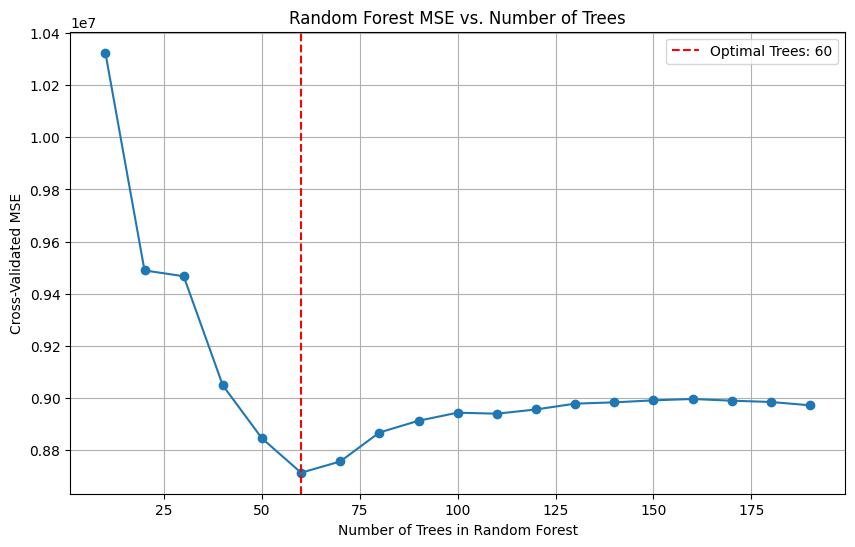

The optimal number of trees is 60 with a minimum MSE of 8713410.836678423.


In [24]:
# Cross Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the range of `n_estimators`
estimator_range = range(10, 200, 10)

# List to store the average of negative MSE scores
average_neg_mse_scores = []

# Evaluate a Random Forest model for each `n_estimators` value
for n_estimators in estimator_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    # Note: Using 'neg_mean_squared_error' to facilitate maximizing the score later
    neg_mse_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    average_neg_mse_scores.append(np.mean(neg_mse_scores))

# Convert negative MSE scores to positive values
mse_scores = [-x for x in average_neg_mse_scores]

# Find the optimal number of trees that minimize MSE
optimal_trees = estimator_range[np.argmin(mse_scores)]

# Plot the MSE for each value of `n_estimators`
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, mse_scores, marker='o')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Cross-Validated MSE')
plt.title('Random Forest MSE vs. Number of Trees')
plt.axvline(x=optimal_trees, color='r', linestyle='--', label=f'Optimal Trees: {optimal_trees}')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of trees
print(f"The optimal number of trees is {optimal_trees} with a minimum MSE of {min(mse_scores)}.")



In [34]:
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=60, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R^2
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest RMSE: 3412.102391740736
Random Forest R^2: 0.8963964228308132


In [38]:
# Convert the actual and predicted results into a DataFrame
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_rf
})

# Optionally, calculate the difference and percentage error
results_df['Difference'] = results_df['Predicted Price'] - results_df['Actual Price']
results_df['Percentage Error'] = (results_df['Difference'] / results_df['Actual Price']) * 100

# Display the first few rows of the dataframe to verify
results_df


,Actual Price,Predicted Price,Difference,Percentage Error
45,36000,31576.300000,-4423.700000,-12.288056
137,11694,14319.716667,2625.716667,22.453537
76,6989,8638.516667,1649.516667,23.601612
144,6938,7630.700000,692.700000,9.984145
113,7609,7102.516667,-506.483333,-6.656372
152,8238,7584.483333,-653.516667,-7.932953
15,41315,29699.933333,-11615.066667,-28.113437
18,6295,5874.200000,-420.800000,-6.684670
16,36880,32232.516667,-4647.483333,-12.601636
9,16430,12809.669444,-3620.330556,-22.034879


In [39]:
# Print summary statistics for the results
print("\nSummary Statistics:")
print(results_df.describe())


Summary Statistics:
       Actual Price  Predicted Price    Difference  Percentage Error
count     39.000000        39.000000     39.000000         39.000000
mean   13728.974359     13255.648291   -473.326068          3.367189
std    10739.280478      8286.168266   3423.286361         15.502109
min     5389.000000      5874.200000 -11672.500000        -28.113437
25%     6963.500000      7400.458333   -529.341667         -6.670521
50%     8949.000000      9933.872222    431.683333          5.929256
75%    15624.000000     16330.475000   1091.036111         11.613183
max    45400.000000     33727.500000   4396.783333         36.947759


## Conclusion

The PCA reduced dimensions of the data from 24 features to 12 features. We then use the PCA transformed data to create a machine learning model (Random Forest Regression) to predict the price of a vehicle given its 12 features. By cross-validating, we determined the optimal number of trees for this algorithm should be 60. The result of the pridiction alforithm achieved a Root Mean Squared Error of 3412 and R^2 of 0.896. In other words, the model's prediction is on average $3412 away from the actual price, and about 89.6% of the variance in vehicle prices can be explained by the features included in this model. 